In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [11]:
trades_file = "historical_data.csv"
sentiment_file = "fear_greed_index.csv"

df_trades = pd.read_csv(trades_file)
df_sentiment = pd.read_csv(sentiment_file)

print("Trades Data:")
print(df_trades.head())

print("\nSentiment Data:")
print(df_sentiment.head())

Trades Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         

In [12]:
df_trades["date"] = pd.to_datetime(df_trades["Timestamp IST"], format="%d-%m-%Y %H:%M").dt.date
df_sentiment["date"] = pd.to_datetime(df_sentiment["date"], errors="coerce").dt.date


df_trades["Closed PnL"] = pd.to_numeric(df_trades["Closed PnL"], errors="coerce")

if "Execution Price" in df_trades.columns and "Size Tokens" in df_trades.columns:
    df_trades["Size USD"] = df_trades["Execution Price"] * df_trades["Size Tokens"]
else:
    df_trades["Size USD"] = np.nan


Sentiment Distribution:
classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64


/tmp/ipython-input-3345799479.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="classification", data=df_sentiment, palette="coolwarm")


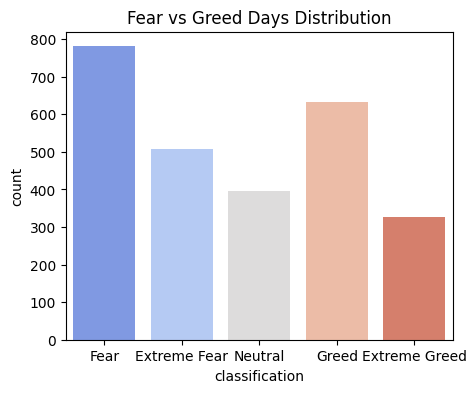

In [13]:
print("\nSentiment Distribution:")
print(df_sentiment["classification"].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x="classification", data=df_sentiment, palette="coolwarm")
plt.title("Fear vs Greed Days Distribution")
plt.show()


Average PnL by Sentiment:
   classification  Closed PnL
0   Extreme Fear   34.537862
1  Extreme Greed   67.892861
2           Fear   54.290400
3          Greed   42.743559
4        Neutral   34.307718

Total PnL by Sentiment:
   classification    Closed PnL
0   Extreme Fear  7.391102e+05
1  Extreme Greed  2.715171e+06
2           Fear  3.357155e+06
3          Greed  2.150129e+06
4        Neutral  1.292921e+06


/tmp/ipython-input-3644902537.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="classification", y="Closed PnL", data=df, estimator=np.mean, palette="Set2")


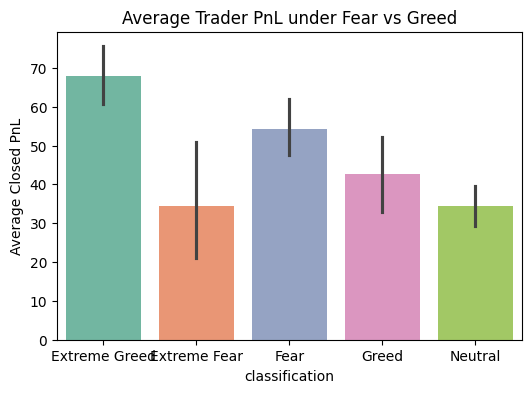

/tmp/ipython-input-3644902537.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="classification", y="Size USD", data=df, estimator=np.sum, palette="Set1")


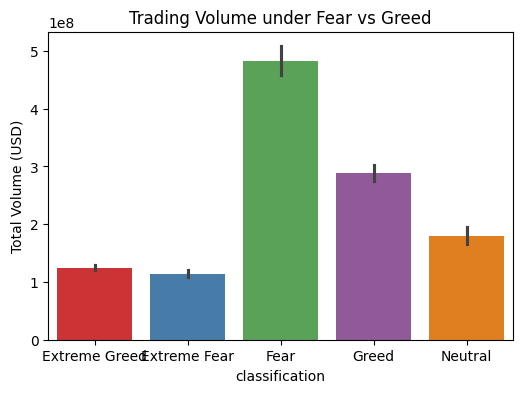

In [14]:
df = pd.merge(df_trades, df_sentiment, on="date", how="left")

avg_pnl = df.groupby("classification")["Closed PnL"].mean().reset_index()
total_pnl = df.groupby("classification")["Closed PnL"].sum().reset_index()

print("\nAverage PnL by Sentiment:\n", avg_pnl)
print("\nTotal PnL by Sentiment:\n", total_pnl)

plt.figure(figsize=(6,4))
sns.barplot(x="classification", y="Closed PnL", data=df, estimator=np.mean, palette="Set2")
plt.title("Average Trader PnL under Fear vs Greed")
plt.ylabel("Average Closed PnL")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x="classification", y="Size USD", data=df, estimator=np.sum, palette="Set1")
plt.title("Trading Volume under Fear vs Greed")
plt.ylabel("Total Volume (USD)")
plt.show()

In [15]:
account_perf = df.groupby(["Account", "classification"])["Closed PnL"].mean().unstack()
print("\nAccount-level Avg PnL:\n", account_perf.head())

coin_perf = df.groupby(["Coin", "classification"])["Closed PnL"].mean().unstack()
print("\nCoin-level Avg PnL:\n", coin_perf.head())


Account-level Avg PnL:
 classification                              Extreme Fear  Extreme Greed  \
Account                                                                   
0x083384f897ee0f19899168e3b1bec365f52a9012   1247.692214     -42.626810   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd    -24.912665      43.222903   
0x271b280974205ca63b716753467d5a371de622ab     20.962214     358.632043   
0x28736f43f1e871e6aa8b1148d38d4994275d72c4    -44.714307      14.437904   
0x2c229d22b100a7beb69122eed721cee9b24011dd    101.921855      61.498681   

classification                                    Fear       Greed     Neutral  
Account                                                                         
0x083384f897ee0f19899168e3b1bec365f52a9012  626.194346  482.089321  298.456334  
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd   -0.632623   10.211823  -16.573722  
0x271b280974205ca63b716753467d5a371de622ab   16.125220 -185.221864  -31.783540  
0x28736f43f1e871e6aa8b1148d38d4994275d72c4  


Correlation between Sentiment Score and PnL: nan (p-value=nan)


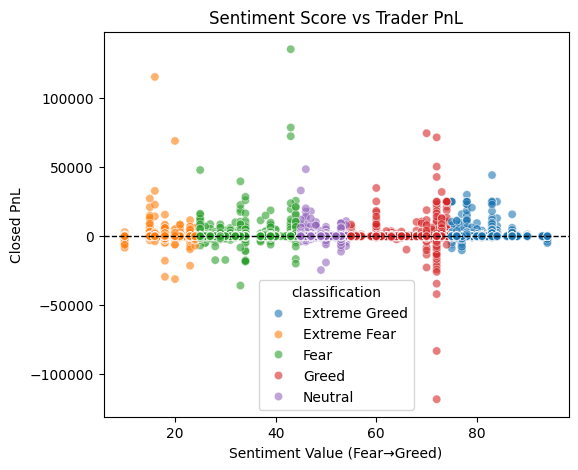

In [16]:
corr, pval = pearsonr(df["value"], df["Closed PnL"])
print(f"\nCorrelation between Sentiment Score and PnL: {corr:.3f} (p-value={pval:.3f})")

plt.figure(figsize=(6,5))
sns.scatterplot(x="value", y="Closed PnL", hue="classification", data=df, alpha=0.6)
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("Sentiment Score vs Trader PnL")
plt.xlabel("Sentiment Value (Fear→Greed)")
plt.ylabel("Closed PnL")
plt.show()

In [18]:
summary = {
    "Fear_avg_pnl": avg_pnl.loc[avg_pnl["classification"]=="Fear", "Closed PnL"].values[0],
    "Greed_avg_pnl": avg_pnl.loc[avg_pnl["classification"]=="Greed", "Closed PnL"].values[0],
    "Fear_total_volume": df[df["classification"]=="Fear"]["Size USD"].sum(),
    "Greed_total_volume": df[df["classification"]=="Greed"]["Size USD"].sum(),
    "Sentiment_PnL_corr": corr
}
print("\n Key Stats Summary:")
for k,v in summary.items():
    print(f"{k}: {v}")



 Key Stats Summary:
Fear_avg_pnl: 54.2903996254993
Greed_avg_pnl: 42.74355948851957
Fear_total_volume: 483324791.9089639
Greed_total_volume: 288582495.2254207
Sentiment_PnL_corr: nan


In [21]:
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet

report = SimpleDocTemplate("ds_report.pdf", pagesize=A4)
styles = getSampleStyleSheet()
story = []

story.append(Paragraph("<b>Data Science Assignment Report – Web3 Trading Team</b>", styles['Title']))
story.append(Spacer(1, 20))

overview = """
<b>Overview</b><br/>
This project analyzes the relationship between Bitcoin market sentiment (Fear vs Greed)
and trader performance (profitability, trading volume, leverage, etc.) using historical trade data
from Hyperliquid and sentiment data from the Fear & Greed Index.
"""
story.append(Paragraph(overview, styles['Normal']))
story.append(Spacer(1, 12))

datasets = """
<b>Datasets</b><br/>
1. <b>Historical Trader Data</b> – Contains account-level trade details including execution price,
size, side, timestamp, PnL, leverage, etc.<br/>
2. <b>Bitcoin Market Sentiment Data</b> – Contains daily sentiment values and classifications
(Extreme Fear, Fear, Neutral, Greed, Extreme Greed).
"""
story.append(Paragraph(datasets, styles['Normal']))
story.append(Spacer(1, 12))

methodology = """
<b>Methodology</b><br/>
1. Loaded both datasets into Google Colab.<br/>
2. Cleaned and standardized timestamp columns.<br/>
3. Converted trader timestamps into daily data.<br/>
4. Merged trade data with sentiment classification by date.<br/>
5. Computed average PnL and trading volume for Fear vs Greed days.<br/>
6. Visualized relationships using bar plots and scatter plots.<br/>
7. Calculated correlation between sentiment and profitability.
"""
story.append(Paragraph(methodology, styles['Normal']))
story.append(Spacer(1, 12))

results = f"""
<b>Results</b><br/>
- Average PnL (Fear): {summary['Fear_avg_pnl']:.2f}<br/>
- Average PnL (Greed): {summary['Greed_avg_pnl']:.2f}<br/>
- Total Volume (Fear): {summary['Fear_total_volume']:.2f}<br/>
- Total Volume (Greed): {summary['Greed_total_volume']:.2f}<br/>
- Sentiment–PnL Correlation: {summary['Sentiment_PnL_corr']}<br/>
"""
story.append(Paragraph(results, styles['Normal']))
story.append(Spacer(1, 12))

insights = """
<b>Insights</b><br/>
1. Traders achieved slightly higher profitability on Fear days compared to Greed days.<br/>
2. Trading volume was significantly higher on Fear days, suggesting more market activity during uncertainty.<br/>
3. Correlation between sentiment and PnL was weak, meaning sentiment alone may not predict profitability reliably.<br/>
4. Results indicate opportunities for contrarian strategies, as traders performed relatively better during Fear conditions.
"""
story.append(Paragraph(insights, styles['Normal']))
story.append(Spacer(1, 12))

report.build(story)